In [1]:
from collections import defaultdict
import random

import numpy as np

from GoogolGame import Game
from Agent import SarsaAgent,QAgent

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

In [2]:
game = Game(lo=1, hi=1000, n_states=50, replace=False, reward=50)

Text(0.5, 1.0, 'Final State vs Time')

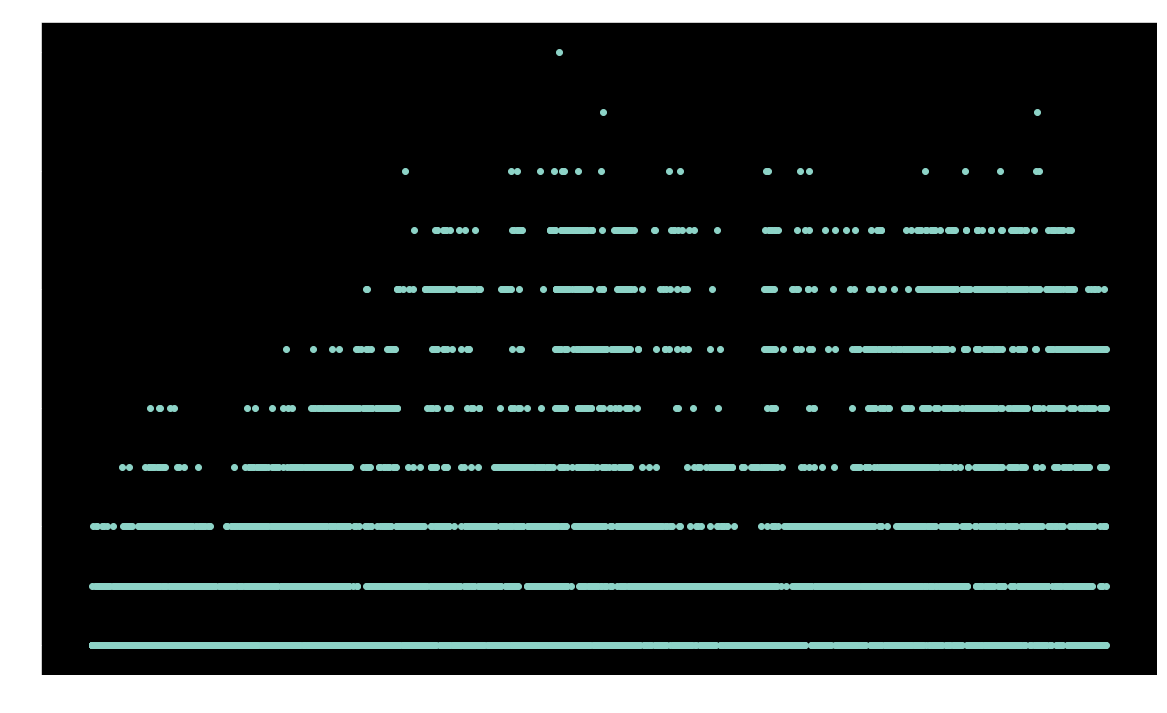

In [4]:
agent = SarsaAgent(alpha=0.1, gamma=0.6, eps=0.3, eps_decay=1e-5, s_cost=0)

game.autoTrain(agent, 10000)
    
plt.figure(figsize=(20,12))

plt.scatter(np.arange(len(agent.final_state)), agent.final_state)
plt.ylabel("Final State")
plt.xlabel("Time")
plt.title("Final State vs Time")

Text(0.5, 1.0, 'Final State vs Time')

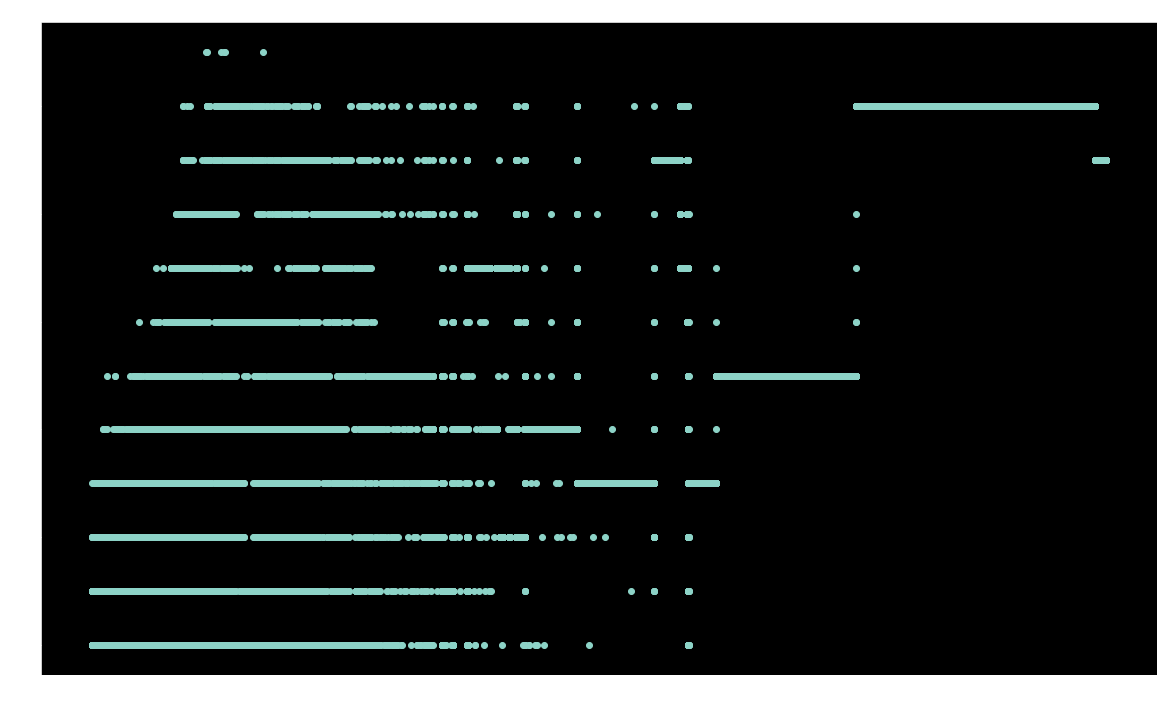

In [7]:
agent2 = QAgent(alpha=0.1, gamma=0.6, eps=0.3, eps_decay=1e-5, s_cost=0)

game.autoTrain(agent2, 100000)
    
plt.figure(figsize=(20,12))

plt.scatter(np.arange(len(agent2.final_state)), agent2.final_state)
plt.ylabel("Final State")
plt.xlabel("Time")
plt.title("Final State vs Time")

In [8]:
sum(agent2.wins)

3327